# Importing the Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Reading the dataset

In [2]:
df= pd.read_csv(r'C:\Univ\3rd Semester\project\credit_bank.csv')

In [3]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


# The Dataset size 

In [4]:
df.shape

(100514, 19)

The dataset has 1,00,514 rows and 19 features

# Number of missing values

In [5]:
df.isnull().sum()

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

We have significant number of rows have missing values in Months since last delinquent, Credit Score,Years in current job and Annual Income Features

# Dropping the missing values

In [5]:
df.dropna(inplace=True)

In [7]:
df.shape

(36423, 19)

In [8]:
df.isnull().sum()

Loan ID                         0
Customer ID                     0
Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Years in current job            0
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

As we can see there are no missing or null values in the dataset

# Dropping the insignificant Features

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36423 entries, 2 to 99997
Data columns (total 19 columns):
Loan ID                         36423 non-null object
Customer ID                     36423 non-null object
Loan Status                     36423 non-null object
Current Loan Amount             36423 non-null float64
Term                            36423 non-null object
Credit Score                    36423 non-null float64
Annual Income                   36423 non-null float64
Years in current job            36423 non-null object
Home Ownership                  36423 non-null object
Purpose                         36423 non-null object
Monthly Debt                    36423 non-null float64
Years of Credit History         36423 non-null float64
Months since last delinquent    36423 non-null float64
Number of Open Accounts         36423 non-null float64
Number of Credit Problems       36423 non-null float64
Current Credit Balance          36423 non-null float64
Maximum Open Credi

The important features will be selected based on the correlation between the independent variable and dependent variable.  
note the dependent varibale is a string as of now before calculating correlation, so we will change it into numeric

In [6]:
df['Loan Status']= df['Loan Status'].map({'Fully Paid':0,'Charged Off':1})

In [11]:
df['Loan Status'].value_counts()

0    28972
1     7451
Name: Loan Status, dtype: int64

In [12]:
def coefpval(x,y):
    x=x[x.corr().columns]
    from scipy import stats
    ls=[]
    for i in range(x.shape[1]):
        ls.append(stats.pearsonr(x.iloc[:,i], y)  )
    copv=pd.DataFrame(ls,index=x.columns,columns= ['Pearson-Coeff','P-Value'])
    copv['P-Ind'] = pd.cut(copv['P-Value'], bins =[0, 0.001, 0.05,0.1, 1.0], labels=['Strong','Moderate','Weak','Insignificant'], include_lowest=True )
    copv['C-Ind'] = pd.cut(copv['Pearson-Coeff'], bins =[-1.0,0, 1.0], labels=['Negative','Positive'], include_lowest=True )
    
    return copv

In [330]:
coefpval(df,df['Loan Status'])

,Pearson-Coeff,P-Value,P-Ind,C-Ind
Loan Status,1.000000,0.000000e+00,Strong,Positive
Current Loan Amount,-0.200122,0.000000e+00,Strong,Negative
Credit Score,0.467169,0.000000e+00,Strong,Positive
Annual Income,-0.059817,3.107983e-30,Strong,Negative
Monthly Debt,0.016347,1.809501e-03,Moderate,Positive
Years of Credit History,-0.030938,3.511403e-09,Strong,Negative
Months since last delinquent,-0.016191,2.001290e-03,Moderate,Negative
Number of Open Accounts,0.025361,1.293957e-06,Strong,Positive
Number of Credit Problems,0.005907,2.596299e-01,Insignificant,Positive
Current Credit Balance,-0.008538,1.032113e-01,Insignificant,Negative


From above we can see that we have 4 insignificant columns

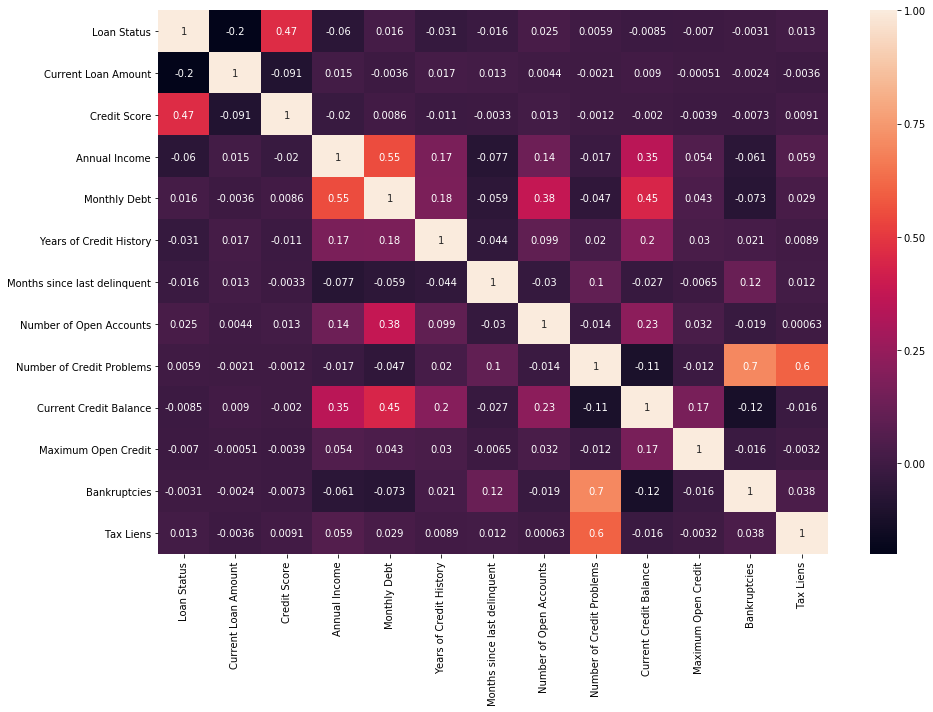

In [331]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

as the Loan ID and Customer ID are not relevant to the dependent variable we can drop those first

In [132]:

# Function of multi-Correlation
def correlation(data, threshold=0.80):
    col_corr = set()  # Set of all the names of deleted columns
    corr_matrix = data.corr()
    print('  \n    Correlation with more than :',threshold)
    print('\n\nCorr Value',"\t""\t", 'Fearture1', "\t", 'Feature 2')
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                print(corr_matrix.iloc[i, j], "\t", corr_matrix.columns[i], "\t" "\t", corr_matrix.columns[j])
                
    print('\n\n The above mentioned correlations only are present in the given Dataset')

In [332]:
correlation(df,0.80)

  
    Correlation with more than : 0.8


Corr Value 		 Fearture1 	 Feature 2


 The above mentioned correlations only are present in the given Dataset


In [7]:
df.drop(columns=['Loan ID','Customer ID'],inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36423 entries, 2 to 99997
Data columns (total 17 columns):
Loan Status                     36423 non-null int64
Current Loan Amount             36423 non-null float64
Term                            36423 non-null object
Credit Score                    36423 non-null float64
Annual Income                   36423 non-null float64
Years in current job            36423 non-null object
Home Ownership                  36423 non-null object
Purpose                         36423 non-null object
Monthly Debt                    36423 non-null float64
Years of Credit History         36423 non-null float64
Months since last delinquent    36423 non-null float64
Number of Open Accounts         36423 non-null float64
Number of Credit Problems       36423 non-null float64
Current Credit Balance          36423 non-null float64
Maximum Open Credit             36423 non-null float64
Bankruptcies                    36423 non-null float64
Tax Liens        

from the above results after dropping 2 columns, we have 4 columns of data type object so no we need to convert it into categorical variable

# One-Hot Encoding (Conversion of categorical to Numerical)

In [16]:
df['Years in current job'].value_counts()

10+ years    13149
2 years       3225
3 years       2997
< 1 year      2699
5 years       2487
4 years       2286
1 year        2247
6 years       2109
7 years       2082
8 years       1675
9 years       1467
Name: Years in current job, dtype: int64

In [8]:
df['Years in current job']=df['Years in current job'].map({'10+ years':10,'2 years':2,'3 years':3,'< 1 year':0,'5 years':5
                                                            ,'1 year':1,'4 years':4,'7 years':7,'6 years':6,'8 years':8
                                                            ,'9 years':9})

In [18]:
df['Years in current job'].value_counts()

10    13149
2      3225
3      2997
0      2699
5      2487
4      2286
1      2247
6      2109
7      2082
8      1675
9      1467
Name: Years in current job, dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36423 entries, 2 to 99997
Data columns (total 17 columns):
Loan Status                     36423 non-null int64
Current Loan Amount             36423 non-null float64
Term                            36423 non-null object
Credit Score                    36423 non-null float64
Annual Income                   36423 non-null float64
Years in current job            36423 non-null int64
Home Ownership                  36423 non-null object
Purpose                         36423 non-null object
Monthly Debt                    36423 non-null float64
Years of Credit History         36423 non-null float64
Months since last delinquent    36423 non-null float64
Number of Open Accounts         36423 non-null float64
Number of Credit Problems       36423 non-null float64
Current Credit Balance          36423 non-null float64
Maximum Open Credit             36423 non-null float64
Bankruptcies                    36423 non-null float64
Tax Liens         

In [20]:
df['Term'].value_counts()

Short Term    25855
Long Term     10568
Name: Term, dtype: int64

In [21]:
df['Home Ownership'].value_counts()

Home Mortgage    18831
Rent             14300
Own Home          3205
HaveMortgage        87
Name: Home Ownership, dtype: int64

In [22]:
df['Purpose'].value_counts()

Debt Consolidation      28202
Home Improvements        2409
other                    2313
Other                    1150
Business Loan             596
Medical Bills             444
Buy a Car                 428
Buy House                 263
Take a Trip               219
major_purchase            116
small_business            111
moving                     55
vacation                   41
wedding                    39
Educational Expenses       33
renewable_energy            4
Name: Purpose, dtype: int64

From above we can see that there are 2 other category one with small 'o' and another with capital 'O', so we need to convert it.   
and we can group the moving,vacation,wedding,Educational Expenses and renewable_energy values into one category

In [9]:
df['Purpose'].replace('other','Other',inplace=True)

In [24]:
df['Purpose'].value_counts()

Debt Consolidation      28202
Other                    3463
Home Improvements        2409
Business Loan             596
Medical Bills             444
Buy a Car                 428
Buy House                 263
Take a Trip               219
major_purchase            116
small_business            111
moving                     55
vacation                   41
wedding                    39
Educational Expenses       33
renewable_energy            4
Name: Purpose, dtype: int64

In [10]:
df=pd.get_dummies(df)

In [26]:
df.head()

,Loan Status,Current Loan Amount,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,...,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
2,0,99999999.0,741.0,2231892.0,8,29200.53,14.9,29.0,18.0,1.0,...,0,0,0,0,0,0,0,0,0,0
6,0,217646.0,730.0,1184194.0,0,10855.08,19.6,10.0,13.0,1.0,...,0,0,0,0,0,0,0,0,0,0
8,0,548746.0,678.0,2559110.0,2,18660.28,22.6,33.0,4.0,0.0,...,0,0,0,0,0,0,0,0,0,0
10,0,99999999.0,728.0,714628.0,3,11851.06,16.0,76.0,16.0,0.0,...,0,0,0,0,0,0,0,0,0,0
12,0,99999999.0,740.0,776188.0,0,11578.22,8.5,25.0,6.0,0.0,...,0,0,0,0,0,0,0,0,0,0


# Checking the balance of Data

In [346]:
df['Loan Status'].value_counts()

0    28972
1     7451
Name: Loan Status, dtype: int64

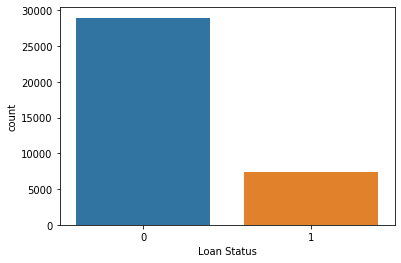

In [347]:
sns.countplot(x='Loan Status',data=df)

As we can see above the data is imbalanced becasue we have 20.45% of data is for Charged off and remaining is for the Fully paid.     
so we will do sampling for the Fully paid to get the same amount of rows as of Charged off (only for modelling purpose but for testing we will use the entire dataset)

In [62]:
a=df[df['Loan Status']==0].sample(10000,axis=0,random_state=999)

In [28]:
a.head()

,Loan Status,Current Loan Amount,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,...,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
64125,0,390060.0,721.0,1684350.0,10,24703.80,18.4,15.0,14.0,0.0,...,0,0,0,0,0,0,0,0,0,0
46509,0,206052.0,712.0,1154250.0,10,16448.11,17.6,13.0,8.0,0.0,...,0,0,0,0,0,0,0,0,0,0
95364,0,138666.0,705.0,478990.0,5,8581.92,12.6,10.0,17.0,0.0,...,0,0,0,0,0,0,0,0,0,0
45939,0,296340.0,711.0,1687428.0,1,47107.46,11.4,71.0,9.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7465,0,180180.0,740.0,622478.0,0,9591.39,15.7,65.0,9.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
a.shape

(10000, 35)

In [63]:
b=df[df['Loan Status']==1].sample(4000,axis=0,random_state=999)

In [30]:
b.head()

,Loan Status,Current Loan Amount,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,...,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
12961,1,349052.0,696.0,2260848.0,10,27488.06,29.3,65.0,18.0,1.0,...,0,0,0,0,0,0,0,0,0,0
33539,1,194546.0,725.0,1157499.0,10,19291.65,21.7,71.0,6.0,0.0,...,0,0,0,0,0,0,0,0,0,0
18377,1,578226.0,6740.0,2082685.0,2,27127.06,17.0,13.0,11.0,0.0,...,0,0,0,0,0,0,0,0,0,0
70062,1,108834.0,728.0,5432252.0,3,86463.30,16.3,2.0,10.0,0.0,...,0,1,0,0,0,0,0,0,0,0
39458,1,261316.0,729.0,652479.0,7,17834.35,15.4,51.0,10.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
b.shape

(4000, 35)

In [64]:
df1= pd.concat([a,b],axis=0)

In [35]:
df1.head()

,Loan Status,Current Loan Amount,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,...,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
32354,0,133474.0,741.0,537909.0,1,3998.36,23.4,35.0,9.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3042,0,279972.0,723.0,842688.0,10,10674.01,15.6,53.0,6.0,2.0,...,0,0,0,0,0,0,0,0,0,0
43804,0,392348.0,649.0,987506.0,0,16713.73,16.5,58.0,17.0,0.0,...,0,0,0,0,0,0,0,0,0,0
38052,0,99999999.0,721.0,1050624.0,5,21012.67,17.0,21.0,8.0,0.0,...,0,0,0,0,0,0,0,0,0,0
54800,0,405218.0,724.0,1458212.0,7,37791.76,13.7,35.0,12.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
df1.shape

(14000, 35)

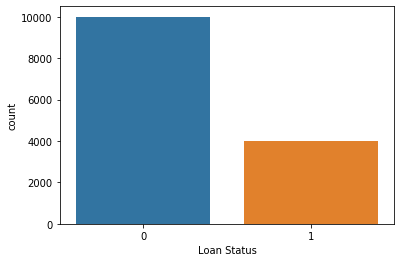

In [35]:
sns.countplot(x='Loan Status',data=df1)

Now we have a balanced data set for Data Modelling

In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14000 entries, 64125 to 72825
Data columns (total 35 columns):
Loan Status                     14000 non-null int64
Current Loan Amount             14000 non-null float64
Credit Score                    14000 non-null float64
Annual Income                   14000 non-null float64
Years in current job            14000 non-null int64
Monthly Debt                    14000 non-null float64
Years of Credit History         14000 non-null float64
Months since last delinquent    14000 non-null float64
Number of Open Accounts         14000 non-null float64
Number of Credit Problems       14000 non-null float64
Current Credit Balance          14000 non-null float64
Maximum Open Credit             14000 non-null float64
Bankruptcies                    14000 non-null float64
Tax Liens                       14000 non-null float64
Term_Long Term                  14000 non-null uint8
Term_Short Term                 14000 non-null uint8
Home Ownership_

As we can see above all the features are now in numerical values

# Data Partitioning

In [16]:
from sklearn.model_selection import train_test_split

In [65]:
x=df1.drop('Loan Status',axis=1)

In [38]:
x.head()

,Current Loan Amount,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,...,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
32354,133474.0,741.0,537909.0,1,3998.36,23.4,35.0,9.0,0.0,70585.0,...,0,0,0,0,0,0,0,0,0,0
3042,279972.0,723.0,842688.0,10,10674.01,15.6,53.0,6.0,2.0,113658.0,...,0,0,0,0,0,0,0,0,0,0
43804,392348.0,649.0,987506.0,0,16713.73,16.5,58.0,17.0,0.0,169765.0,...,0,0,0,0,0,0,0,0,0,0
38052,99999999.0,721.0,1050624.0,5,21012.67,17.0,21.0,8.0,0.0,111283.0,...,0,0,0,0,0,0,0,0,0,0
54800,405218.0,724.0,1458212.0,7,37791.76,13.7,35.0,12.0,1.0,179379.0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
x.shape

(14000, 34)

In [66]:
y=df1['Loan Status']

In [67]:
y.head()

42223    0
61752    0
28321    0
16447    0
65710    0
Name: Loan Status, dtype: int64

In [42]:
y.shape

(14000,)

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

In [69]:
x_train.shape

(9800, 34)

In [70]:
y_train.shape

(9800,)

In [71]:
x_test.shape

(4200, 34)

In [47]:
y_test.shape

(4200,)

# Decision tree Modelling

In [27]:
from sklearn.tree import DecisionTreeClassifier


In [28]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [29]:
from sklearn.model_selection import cross_val_score

In [72]:
train_cv_array=[]
train_score_array = []
test_score_array = []
train_accscore_array = []
test_accscore_array = []


for d in [3,5,8,10,12,15,18,20,22,24,26,28,30,50,100]:
    dtree = DecisionTreeClassifier(max_depth=d,random_state=999)
    scores = cross_val_score(dtree, x_train, y_train, cv=5)
    print('\nFor maxdepth =',d)
    print('\nCross validation Training mean:',scores.mean())
    dtree.fit(x_train,y_train)
    y_pred=dtree.predict(x_test)
    y_pred_train=dtree.predict(x_train)
    train_score_array.append(dtree.score(x_train, y_train))
    test_score_array.append(dtree.score(x_test, y_test))
    train_accscore_array.append(accuracy_score(y_train,y_pred_train))
    test_accscore_array.append(accuracy_score(y_test,y_pred))
    train_cv_array.append(scores.mean())
    print('Training score without CV:',dtree.score(x_train, y_train))
    print('Test score -->',dtree.score(x_test, y_test))
    print('\n\nAccuracy Training score without CV:',accuracy_score(y_train,y_pred_train))
    print('Accuracy Test score -->',accuracy_score(y_test,y_pred))
    cm=pd.DataFrame(confusion_matrix(y_test,y_pred),index=['True 0','True 1'],columns=['Predicted 0','Predicted 1'])
    print('\n\nConfusion Matrix:\n',cm)
    print('\nClassification report:\n\n',classification_report(y_test,y_pred))
    print('--------------------------------------------------------------------------')
    


For maxdepth = 3

Cross validation Training mean: 0.7905109414712201
Training score without CV: 0.7905102040816326
Test score --> 0.7833333333333333


Accuracy Training score without CV: 0.7905102040816326
Accuracy Test score --> 0.7833333333333333


Confusion Matrix:
         Predicted 0  Predicted 1
True 0         2993            0
True 1          910          297

Classification report:

               precision    recall  f1-score   support

           0       0.77      1.00      0.87      2993
           1       1.00      0.25      0.39      1207

    accuracy                           0.78      4200
   macro avg       0.88      0.62      0.63      4200
weighted avg       0.83      0.78      0.73      4200

--------------------------------------------------------------------------

For maxdepth = 5

Cross validation Training mean: 0.787550976208881
Training score without CV: 0.7918367346938775
Test score --> 0.7766666666666666


Accuracy Training score without CV: 0.7918367346938

From the above results we can see that for classifiaction problems we should look upto the Confusion matrix 
in which for max depth 30 we get the most correctly predicted classification(among other models) for the Loan status is equal to Charged off (eventhough the train and test scores are moderate when compared with max values, this max depth =30 parameter generalizes the unseen/test data well)  

The conclusion is that the Max depth  = 30 is the best parameter for the Decision tree

Decision Tree : The Test score is 0.71119 for max depth =30 with f1-score for 0 as 0.80 and for 1 as 0.51




Note: The accuracy_score and dtree.score gives exactly the same results so we can use only one metrics while moving forward

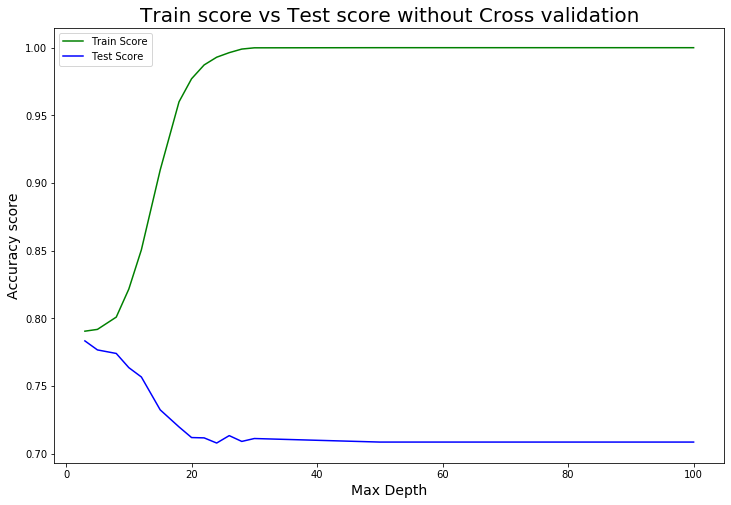

In [73]:
plt.figure(figsize=(12,8))
x_axis = [3,5,8,10,12,15,18,20,22,24,26,28,30,50,100]
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.title('Train score vs Test score without Cross validation',fontsize=20)
plt.xlabel('Max Depth',fontsize=14)
plt.ylabel('Accuracy score',fontsize=14)
plt.show()

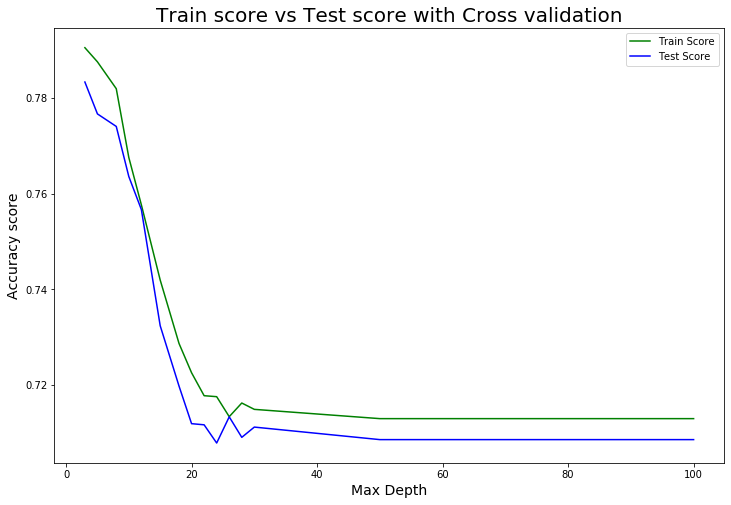

In [74]:
plt.figure(figsize=(12,8))
x_axis = [3,5,8,10,12,15,18,20,22,24,26,28,30,50,100]
plt.plot(x_axis, train_cv_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.title('Train score vs Test score with Cross validation',fontsize=20)
plt.xlabel('Max Depth',fontsize=14)
plt.ylabel('Accuracy score',fontsize=14)
plt.show()

From above we can see the true effect of Cross validation which generalizes almost in consistent with the test score

In [75]:
# Train the model for the best paramenter
dtree = DecisionTreeClassifier(max_depth=30,random_state=999)
dtree.fit(x_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=30,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=999, splitter='best')

In [76]:
dtree.score(x_test,y_test)

0.7111904761904762

Important Features in Decision Tree

In [374]:
dtree.feature_importances_

array([1.20623973e-01, 2.70164498e-01, 8.86647074e-02, 3.27505584e-02,
       7.61540532e-02, 8.11211660e-02, 6.78344045e-02, 5.35800773e-02,
       3.71837850e-03, 7.05337531e-02, 7.20254633e-02, 3.82018064e-03,
       4.74966809e-03, 3.78072696e-03, 5.51002889e-03, 4.67096320e-04,
       6.69387777e-03, 7.88819482e-03, 6.63180547e-03, 3.16191946e-03,
       7.70621194e-04, 8.89262098e-04, 6.29757117e-03, 0.00000000e+00,
       3.23126893e-03, 1.54888853e-04, 5.35272006e-03, 4.11522435e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.43233594e-03,
       4.11522435e-04, 1.17375574e-03])

Text(0.5, 1.0, 'Feature Importances')

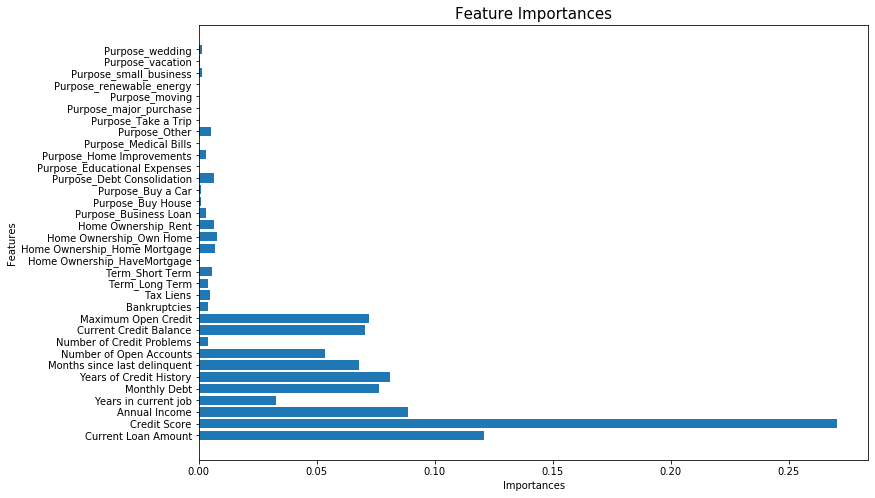

In [375]:
plt.figure(figsize=(12,8))
plt.barh(range(len(x_train.columns)), dtree.feature_importances_, align='center')
plt.yticks(np.arange(len(x_train.columns)), x_train.columns)
plt.ylabel('Features')
plt.xlabel('Importances')
plt.title('Feature Importances',fontsize=15)


From above we can see that the Features like Credit score, Current loan amount,Annual income, Current credit balanace like those
features influences the Decision tree more.  

And the columns like Tax liens, Home owner ship mortgage,Wedding purpose have very very less effect on Decision tree  

# Learning curve

In [394]:
from sklearn.model_selection import learning_curve

In [405]:
train_sizes_dt_en, train_scores_dt_en, validation_scores_dt_en = learning_curve(dtree, X = x_train,y = y_train,train_sizes = [0.2,0.4,0.6,0.8,1],scoring ='f1',n_jobs=-1)
print('Training scores:\n\n', train_scores_dt_en)
print('\nValidation scores:\n\n', validation_scores_dt_en)

C:\Users\munikrishnan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Training scores:

 [[1.         1.         1.        ]
 [0.99145299 1.         1.        ]
 [0.97665904 0.99415205 1.        ]
 [0.99401596 0.99634673 0.99795222]
 [0.99813978 0.98421193 0.99521022]]

Validation scores:

 [[0.4451683  0.47914439 0.50215054]
 [0.46162281 0.48900256 0.51609607]
 [0.47045952 0.48220551 0.50261233]
 [0.47513228 0.48387097 0.50821355]
 [0.4710967  0.48795812 0.52433281]]


In [406]:
train_sizes = [0.2,0.4,0.6,0.8,1]

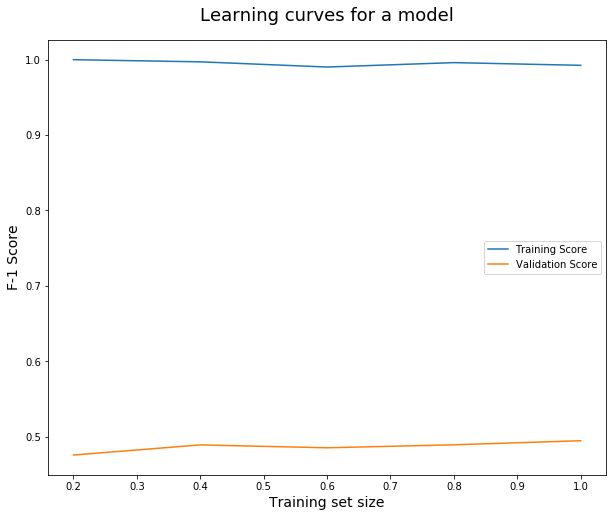

In [415]:
plt.figure(figsize=(10,8))
plt.plot(train_sizes, train_scores_dt_en.mean(axis=1), label = 'Training Score')
plt.plot(train_sizes, validation_scores_dt_en.mean(axis=1), label = 'Validation Score')
plt.ylabel('F-1 Score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a model', fontsize = 18, y = 1.03)
plt.legend()

# Testing on whole data set ( before balancing ):

In [ ]:
#now we will check how the model performs on the full data set before balancing the data
#df is the dataset before sampling from whcih we can draw a sample of 20k rows and will test the model

In [77]:
full_data=pd.concat([df,df1],axis=0)

In [78]:
full_data.shape

(50423, 35)

In [79]:
df.shape

(36423, 35)

In [80]:
df1.shape

(14000, 35)

In [81]:
36423+14000

50423

In [82]:
full_data.drop_duplicates(keep=False,inplace=True)

In [83]:
full_data.shape

(15700, 35)

In [60]:
36423-14000

22423

In [61]:
full_data.head()

,Loan Status,Current Loan Amount,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,...,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
8,0,548746.0,678.0,2559110.0,2,18660.28,22.6,33.0,4.0,0.0,...,0,0,0,0,0,0,0,0,0,0
12,0,99999999.0,740.0,776188.0,0,11578.22,8.5,25.0,6.0,0.0,...,0,0,0,0,0,0,0,0,0,0
14,0,234124.0,727.0,693234.0,10,14211.24,24.7,46.0,10.0,1.0,...,0,0,0,0,0,0,0,0,0,0
20,1,317108.0,687.0,1133274.0,8,9632.81,17.4,53.0,4.0,0.0,...,0,0,0,0,0,0,0,0,0,0
28,0,99999999.0,746.0,1749748.0,10,19247.19,20.0,32.0,17.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
full_data.shape

(15700, 35)

In [85]:
x_full_test=full_data.drop('Loan Status',axis=1)

In [64]:
x_full_test.head()

,Current Loan Amount,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,...,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
8,548746.0,678.0,2559110.0,2,18660.28,22.6,33.0,4.0,0.0,437171.0,...,0,0,0,0,0,0,0,0,0,0
12,99999999.0,740.0,776188.0,0,11578.22,8.5,25.0,6.0,0.0,134083.0,...,0,0,0,0,0,0,0,0,0,0
14,234124.0,727.0,693234.0,10,14211.24,24.7,46.0,10.0,1.0,28291.0,...,0,0,0,0,0,0,0,0,0,0
20,317108.0,687.0,1133274.0,8,9632.81,17.4,53.0,4.0,0.0,60287.0,...,0,0,0,0,0,0,0,0,0,0
28,99999999.0,746.0,1749748.0,10,19247.19,20.0,32.0,17.0,0.0,224390.0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
y_full_test=full_data['Loan Status']

In [87]:
print('full test score -->',dtree.score(x_full_test,y_full_test))
y_pred=dtree.predict(x_full_test)
cm=pd.DataFrame(confusion_matrix(y_full_test,y_pred),index=['True 0','True 1'],columns=['Predicted 0','Predicted 1'])
print('\n\nConfusion Matrix:\n',cm)
print('\nClassification report:\n\n',classification_report(y_full_test,y_pred))
print('--------------------------------------------------------------------------')

full test score --> 0.7369426751592356


Confusion Matrix:
         Predicted 0  Predicted 1
True 0         9808         2441
True 1         1689         1762

Classification report:

               precision    recall  f1-score   support

           0       0.85      0.80      0.83     12249
           1       0.42      0.51      0.46      3451

    accuracy                           0.74     15700
   macro avg       0.64      0.66      0.64     15700
weighted avg       0.76      0.74      0.75     15700

--------------------------------------------------------------------------


as we can see above from the whole imbalanced dataset we get a score of about 0.7369 which is better than 0.71119 which we got when we trained the model with the balanced dataset

# Boosting 

In [88]:
from sklearn.ensemble import AdaBoostClassifier

In [90]:
train_cv_array=[]
train_score_array = []
test_score_array = []

for l in [0.01,0.1,0.5,1]:
    for n in [50,100,150,200,250,300]:
        bstdt = AdaBoostClassifier(dtree,n_estimators=n,learning_rate=l)
        scores = cross_val_score(bstdt, x_train, y_train, cv=5)
        bstdt.fit(x_train,y_train)
        y_pred=bstdt.predict(x_test)
        print('\nFor Learning rate =',l,'and no of trees = ',n)
        train_score_array.append(bstdt.score(x_train, y_train))
        test_score_array.append(bstdt.score(x_test, y_test))
        train_cv_array.append(scores.mean())
        print('\nCross validation Training mean:',scores.mean())
        print('\nTraining score without CV:',bstdt.score(x_train, y_train))
        print('\nTest score -->',bstdt.score(x_test, y_test))
        cm=pd.DataFrame(confusion_matrix(y_test,y_pred),index=['True 0','True 1'],columns=['Predicted 0','Predicted 1'])
        print('\n\nConfusion Matrix:\n',cm)
        print('\nClassification report:\n\n',classification_report(y_test,y_pred))
        print('--------------------------------------------------------------------------')
    
        


For Learning rate = 0.01 and no of trees =  50

Cross validation Training mean: 0.7211213501068122

Training score without CV: 1.0

Test score --> 0.7123809523809523


Confusion Matrix:
         Predicted 0  Predicted 1
True 0         2413          580
True 1          628          579

Classification report:

               precision    recall  f1-score   support

           0       0.79      0.81      0.80      2993
           1       0.50      0.48      0.49      1207

    accuracy                           0.71      4200
   macro avg       0.65      0.64      0.64      4200
weighted avg       0.71      0.71      0.71      4200

--------------------------------------------------------------------------

For Learning rate = 0.01 and no of trees =  100

Cross validation Training mean: 0.7257185501215957

Training score without CV: 1.0

Test score --> 0.7085714285714285


Confusion Matrix:
         Predicted 0  Predicted 1
True 0         2357          636
True 1          588          6

From the above results we can see that for Learning rate of 0.01 and n_estimators =100 we get a test score of 0.7085 with f1score
for 0 as 0.79 and for 1 as 0.50 and the previous decision tree whose scores are test:0.71119 and f1score
for 0 as 0.80 and for 1 as 0.51
 
But for the other combinations of the model, boosting did really increased the accuracy score upto 0.79 and Note: eventhough we get more accuracy score(0.79) in other learning rate and n_estimators combinations we didnt choose them because, for those models the f1_scores are less than Plain decision tree model without boosting hence we chose a optimal one

In [ ]:
#  dtree image pend

# Support Vector Machines

##  ♦ Linear SVC

In [91]:
from sklearn.svm import LinearSVC

Unlike Decision Tree algorithms, we need to standardize the dataset before doing the linear svc

In [92]:
from sklearn.preprocessing import StandardScaler

In [93]:
scale = StandardScaler()

In [94]:
x_train_sc=scale.fit_transform(x_train)

In [95]:
x_test_sc=scale.transform(x_test)

In [96]:
train_cv_array=[]
train_score_array = []
test_score_array = []

for p in [0.1,1,10,15,20]:
    linsvc = LinearSVC(C=p,max_iter=10000,random_state=999)
    scores = cross_val_score(linsvc, x_train_sc, y_train, cv=3)
    print('\nFor C =',p)
    print('\nCross validation Training mean:',scores.mean())
    linsvc.fit(x_train_sc,y_train)
    y_pred=linsvc.predict(x_test_sc)
    train_score_array.append(linsvc.score(x_train_sc, y_train))
    test_score_array.append(linsvc.score(x_test_sc, y_test))
    train_cv_array.append(scores.mean())
    print('Training score without CV:',linsvc.score(x_train_sc, y_train))
    print('Test score -->',linsvc.score(x_test_sc, y_test))
    cm=pd.DataFrame(confusion_matrix(y_test,y_pred),index=['True 0','True 1'],columns=['Predicted 0','Predicted 1'])
    print('\n\nConfusion Matrix:\n',cm)
    print('\nClassification report:\n\n',classification_report(y_test,y_pred))
    print('--------------------------------------------------------------------------')
    


For C = 0.1

Cross validation Training mean: 0.7898979652213151
Training score without CV: 0.7910204081632654
Test score --> 0.7821428571428571


Confusion Matrix:
         Predicted 0  Predicted 1
True 0         2987            6
True 1          909          298

Classification report:

               precision    recall  f1-score   support

           0       0.77      1.00      0.87      2993
           1       0.98      0.25      0.39      1207

    accuracy                           0.78      4200
   macro avg       0.87      0.62      0.63      4200
weighted avg       0.83      0.78      0.73      4200

--------------------------------------------------------------------------


C:\Users\munikrishnan\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\munikrishnan\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\munikrishnan\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



For C = 1

Cross validation Training mean: 0.7898979652213151


C:\Users\munikrishnan\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Training score without CV: 0.7909183673469388
Test score --> 0.7821428571428571


Confusion Matrix:
         Predicted 0  Predicted 1
True 0         2987            6
True 1          909          298

Classification report:

               precision    recall  f1-score   support

           0       0.77      1.00      0.87      2993
           1       0.98      0.25      0.39      1207

    accuracy                           0.78      4200
   macro avg       0.87      0.62      0.63      4200
weighted avg       0.83      0.78      0.73      4200

--------------------------------------------------------------------------


C:\Users\munikrishnan\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\munikrishnan\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\munikrishnan\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



For C = 10

Cross validation Training mean: 0.7907143021823199


C:\Users\munikrishnan\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Training score without CV: 0.7907142857142857
Test score --> 0.7816666666666666


Confusion Matrix:
         Predicted 0  Predicted 1
True 0         2985            8
True 1          909          298

Classification report:

               precision    recall  f1-score   support

           0       0.77      1.00      0.87      2993
           1       0.97      0.25      0.39      1207

    accuracy                           0.78      4200
   macro avg       0.87      0.62      0.63      4200
weighted avg       0.83      0.78      0.73      4200

--------------------------------------------------------------------------


C:\Users\munikrishnan\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\munikrishnan\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\munikrishnan\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



For C = 15

Cross validation Training mean: 0.7900001205870678


C:\Users\munikrishnan\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Training score without CV: 0.789795918367347
Test score --> 0.7816666666666666


Confusion Matrix:
         Predicted 0  Predicted 1
True 0         2974           19
True 1          898          309

Classification report:

               precision    recall  f1-score   support

           0       0.77      0.99      0.87      2993
           1       0.94      0.26      0.40      1207

    accuracy                           0.78      4200
   macro avg       0.86      0.62      0.63      4200
weighted avg       0.82      0.78      0.73      4200

--------------------------------------------------------------------------


C:\Users\munikrishnan\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\munikrishnan\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\munikrishnan\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



For C = 20

Cross validation Training mean: 0.7893879069165305
Training score without CV: 0.7905102040816326
Test score --> 0.7814285714285715


Confusion Matrix:
         Predicted 0  Predicted 1
True 0         2983           10
True 1          908          299

Classification report:

               precision    recall  f1-score   support

           0       0.77      1.00      0.87      2993
           1       0.97      0.25      0.39      1207

    accuracy                           0.78      4200
   macro avg       0.87      0.62      0.63      4200
weighted avg       0.82      0.78      0.73      4200

--------------------------------------------------------------------------


C:\Users\munikrishnan\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


From the above results we can see that the accuracy score has been increased to 0.79 when compared with decision tree's accuracy which is of 0.71, but when we see the f1_score the values are lesser than the Decision tree.

Hence C=15 will be considered as best parameter for linear SVC with an accuray of 0.79

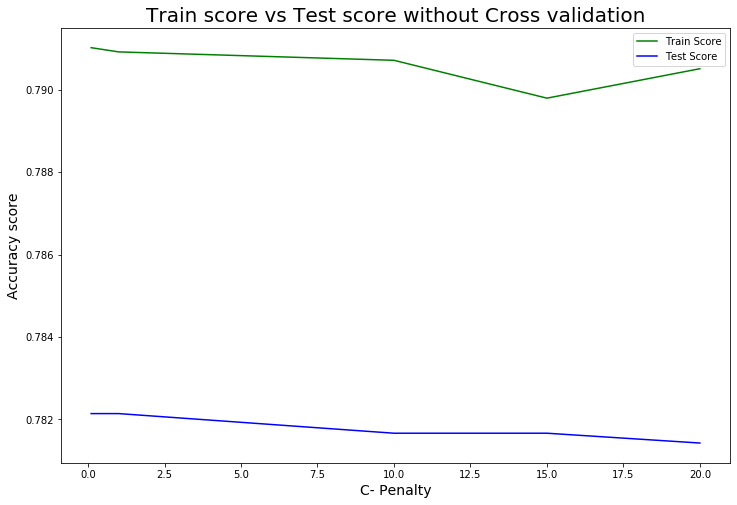

In [97]:
plt.figure(figsize=(12,8))
x_axis = [0.1,1,10,15,20]
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.title('Train score vs Test score without Cross validation',fontsize=20)
plt.xlabel('C- Penalty',fontsize=14)
plt.ylabel('Accuracy score',fontsize=14)
plt.show()

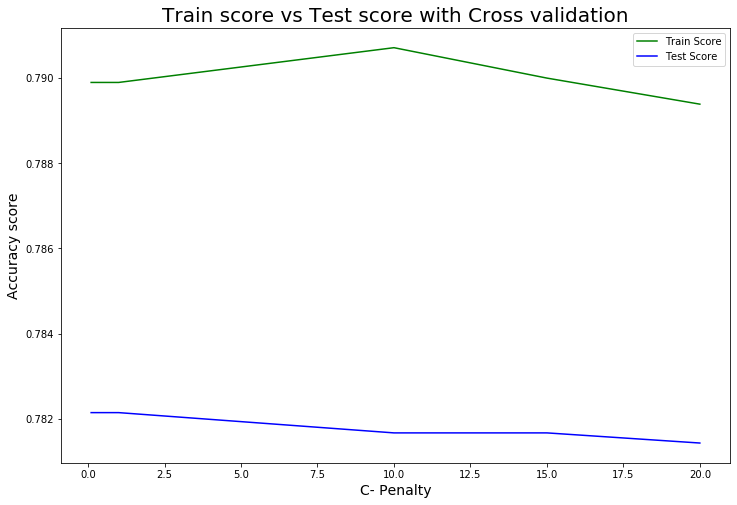

In [98]:
plt.figure(figsize=(12,8))
x_axis = [0.1,1,10,15,20]
plt.plot(x_axis, train_cv_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.title('Train score vs Test score with Cross validation',fontsize=20)
plt.xlabel('C- Penalty',fontsize=14)
plt.ylabel('Accuracy score',fontsize=14)
plt.show()

## ♦ SVC With Linear Kernel

Similar to LinearSVC with parameter kernel='linear', but implemented in terms of
libsvm rather than liblinear , so it has more flexibility in the choice of
penalties and loss functions and should scale better to large numbers of
samples.

In [99]:
from sklearn.svm import SVC

In [100]:
train_cv_array=[]
train_score_array = []
test_score_array = []

for p in [0.1,1,10,15,20]:
    svclink = SVC(C=p,kernel='linear',random_state=999)
    scores = cross_val_score(svclink, x_train_sc, y_train, cv=3)
    print('\nFor C =',p)
    print('\nCross validation Training mean:',scores.mean())
    svclink.fit(x_train_sc,y_train)
    y_pred=svclink.predict(x_test_sc)
    train_score_array.append(svclink.score(x_train_sc, y_train))
    test_score_array.append(svclink.score(x_test_sc, y_test))
    train_cv_array.append(scores.mean())
    print('Training score without CV:',svclink.score(x_train_sc, y_train))
    print('Test score -->',svclink.score(x_test_sc, y_test))
    cm=pd.DataFrame(confusion_matrix(y_test,y_pred),index=['True 0','True 1'],columns=['Predicted 0','Predicted 1'])
    print('\n\nConfusion Matrix:\n',cm)
    print('\nClassification report:\n\n',classification_report(y_test,y_pred))
    print('--------------------------------------------------------------------------')
    


For C = 0.1

Cross validation Training mean: 0.7902040876766702
Training score without CV: 0.7905102040816326
Test score --> 0.7833333333333333


Confusion Matrix:
         Predicted 0  Predicted 1
True 0         2993            0
True 1          910          297

Classification report:

               precision    recall  f1-score   support

           0       0.77      1.00      0.87      2993
           1       1.00      0.25      0.39      1207

    accuracy                           0.78      4200
   macro avg       0.88      0.62      0.63      4200
weighted avg       0.83      0.78      0.73      4200

--------------------------------------------------------------------------

For C = 1

Cross validation Training mean: 0.7902040876766702
Training score without CV: 0.7905102040816326
Test score --> 0.7833333333333333


Confusion Matrix:
         Predicted 0  Predicted 1
True 0         2993            0
True 1          910          297

Classification report:

               prec